## Final Project
### Name: Behnam Sobhani Nadri
### Student ID: 801368949

https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection

Code Example: https://www.kaggle.com/code/ahmedbasem/99-6-accuracy-network-intrusion-detection

## All libraries that we use in the lab is defined here

In [52]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sb
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import metrics

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
file_path='/content/drive/My Drive/Courses/Intro to ML/Project/network_data.csv'
df_network = pd.read_csv(file_path)

file_path='/content/drive/My Drive/Courses/Intro to ML/Project/Test_data.csv'
df_network_test = pd.read_csv(file_path)

## Translate categorical features to binary features
df_network_1 = pd.DataFrame((df_network.iloc[:,1] == "tcp").replace(True,1).replace(False,0)).rename(columns={'protocol_type':'tcp_protocol'})
df_network = pd.concat([df_network, df_network_1], axis = 1)
df_network_2 = pd.DataFrame((df_network.iloc[:,1] == "udp").replace(True,1).replace(False,0)).rename(columns={'protocol_type':'udp_protocol'})
df_network = pd.concat([df_network, df_network_2], axis = 1)
df_network_3 = pd.DataFrame((df_network.iloc[:,1] == "icmp").replace(True,1).replace(False,0)).rename(columns={'protocol_type':'icmp_protocol'})
df_network = pd.concat([df_network, df_network_3], axis = 1)
df_network_4 = pd.DataFrame((df_network.iloc[:,41] == "anomaly").replace(True,1).replace(False,0)).rename(columns={'class':'class_t'})
df_network = pd.concat([df_network, df_network_4], axis = 1)
df_network = df_network.drop(['service','flag','protocol_type','class'],axis=1)
# Drop all features that have null values
df_network = df_network.dropna()
# Choose the features based on
df_network.head(10)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,tcp_protocol,udp_protocol,icmp_protocol,class_t
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,1,0,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1
3,0,232,8153,0,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,0,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,1,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1


In [54]:
df_network.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,tcp_protocol,udp_protocol,icmp_protocol,class_t
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,0.814782,0.119522,0.065695,0.466140
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,0.388482,0.324408,0.247754,0.498862
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Correlation

<Axes: >

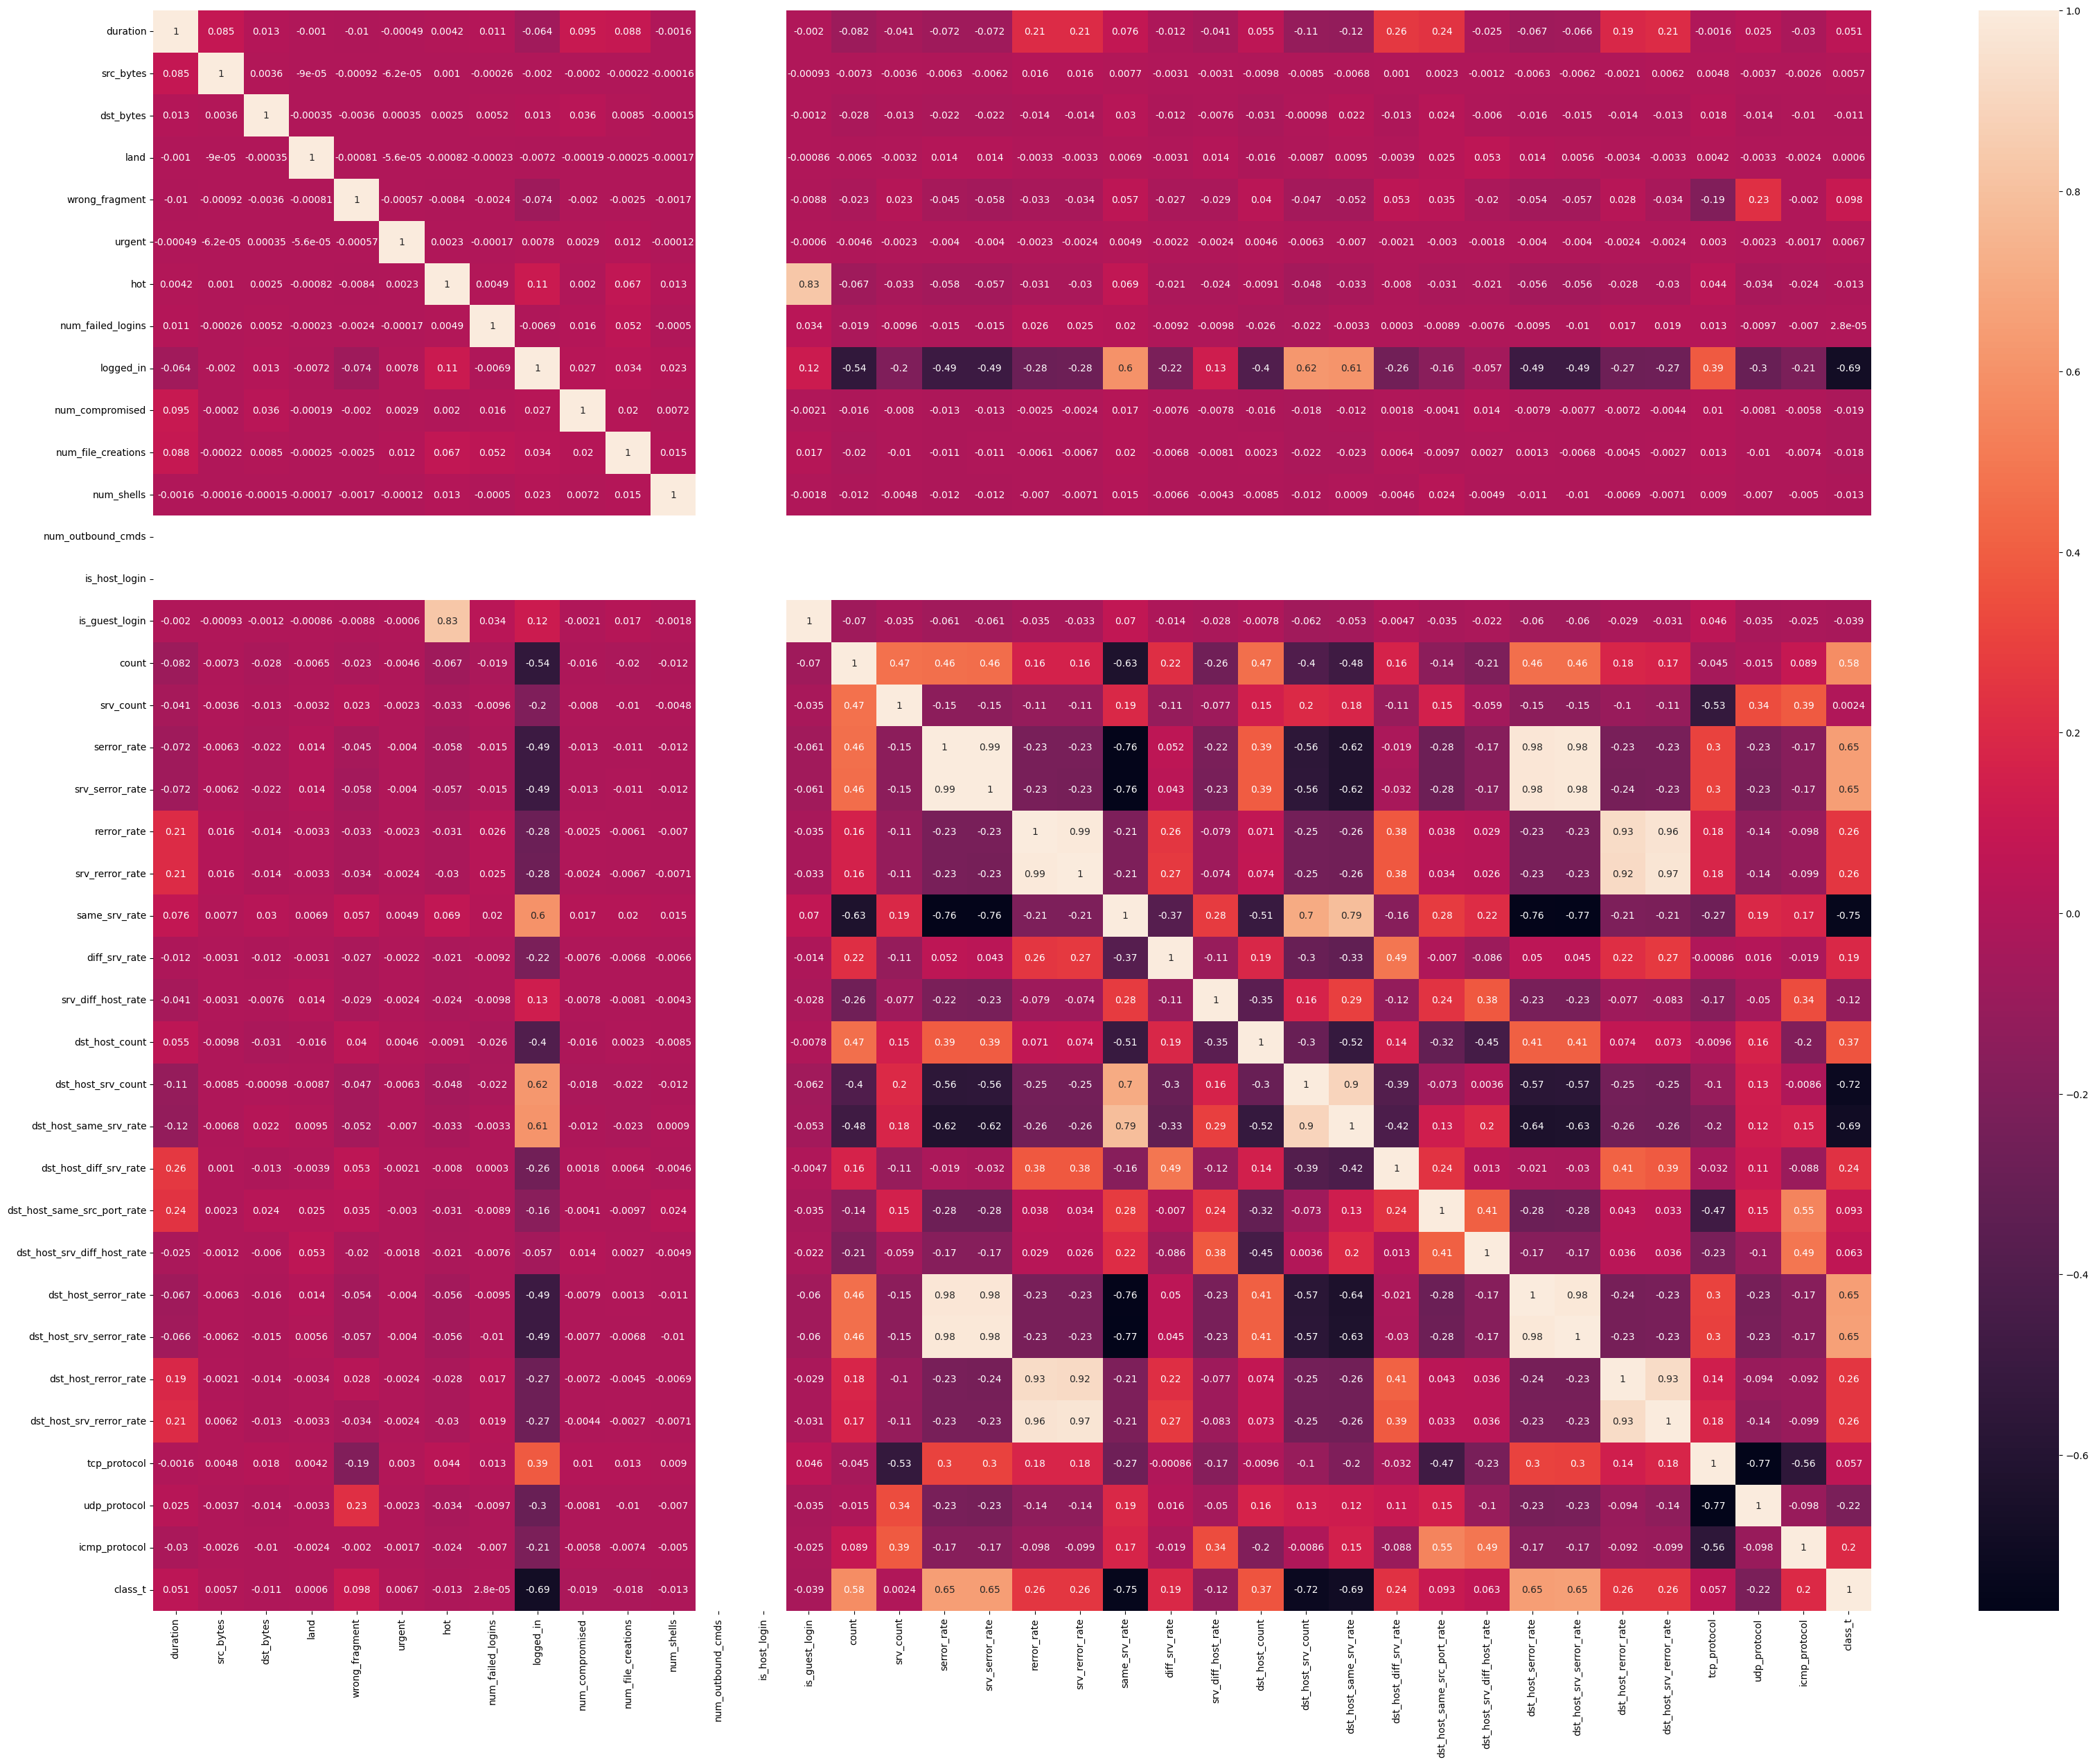

In [55]:
#Based on the heatmap, highly correlated features are dropped to reduced the redundency
df_network = df_network.drop(['num_root','su_attempted','root_shell','num_access_files'],axis=1)
plt.figure(figsize=(40,30))
sb.heatmap(df_network.corr(), annot=True)

In [56]:
X = df_network.iloc[:,1:37].values
Y = df_network.iloc[:,37].values

### Logistic Regression Classifier

In [57]:
K=36
accur = np.zeros((K,2))
prec = np.zeros((K,2))
rec = np.zeros((K,2))
f1 = np.zeros((K,2))

for i in range(K):

    decomposer = PCA(n_components=i+1)
    X_r = decomposer.fit(X).transform(X)
    X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
    sc_X = StandardScaler()
    X_train_r = sc_X.fit_transform(X_train_r)
    X_test_r = sc_X.transform(X_test_r)
    classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
    classifier.fit(X_train_r, Y_train)
    Y_pred = classifier.predict(X_test_r)
    accur [ i, 0]=i+1
    accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
    prec [ i, 0]=i+1
    prec [i,1] = metrics.precision_score(Y_test, Y_pred)
    rec [ i, 0]=i+1
    rec [i,1] = metrics.recall_score(Y_test, Y_pred)
    f1 [ i, 0]=i+1
    f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

maximum_accur = max(accur[:,1])
print("Maximum Accuracy is:", maximum_accur)
print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maximum Accuracy is: 0.9523658304223563
Maximum Accuracy is at K: 25.0


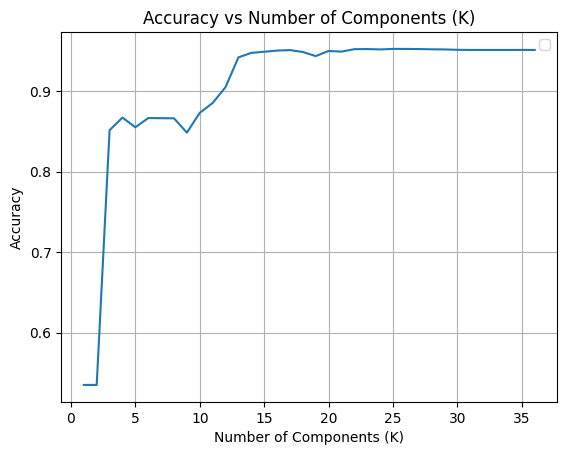

In [58]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components (K)')
plt.legend()

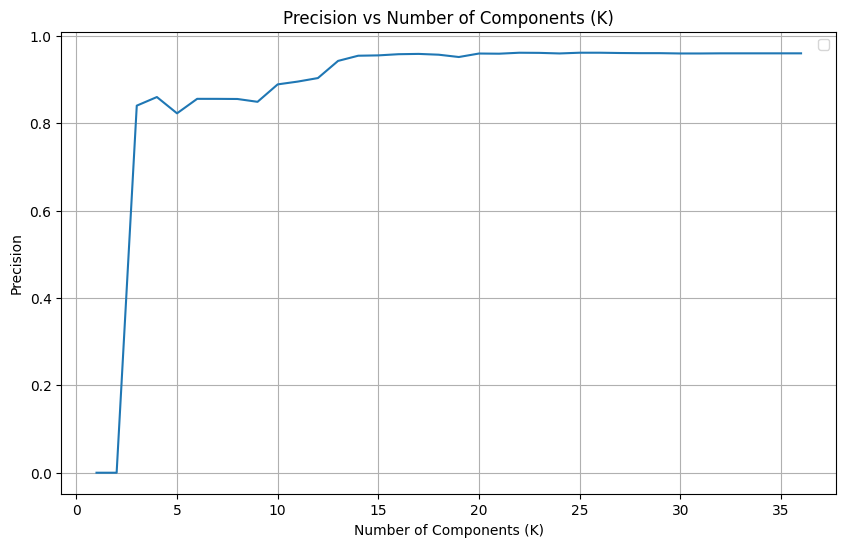

In [59]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K)')
plt.legend()

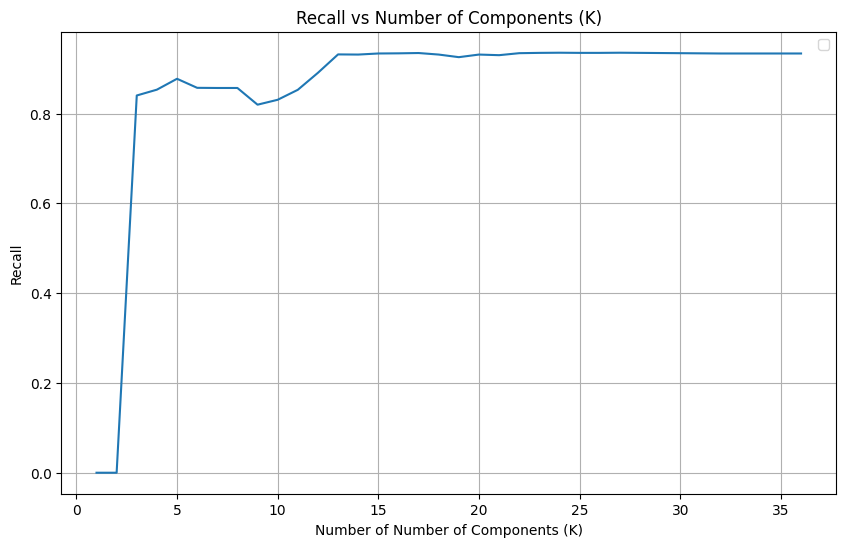

In [60]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K)')
plt.legend()

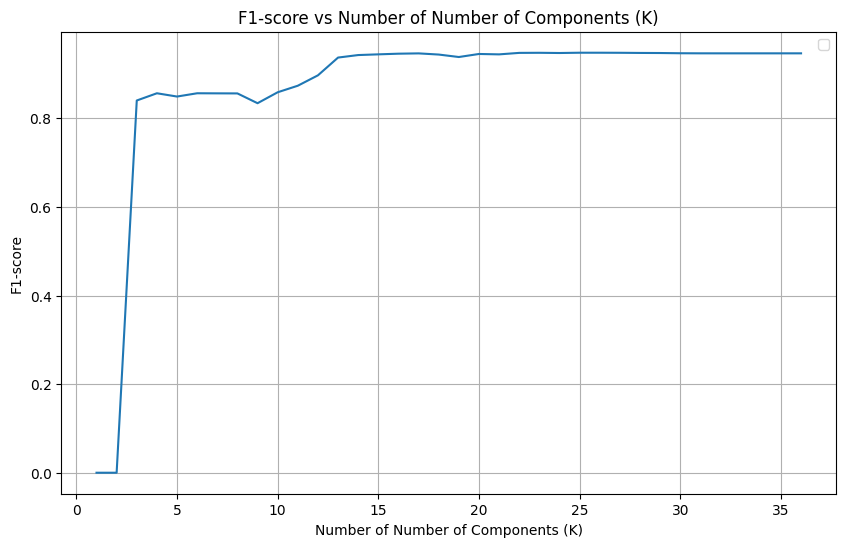

In [61]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K)')
plt.legend()

In [62]:
K=18

decomposer = PCA(n_components=K)
X_r = decomposer.fit(X).transform(X)
X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9485550968561448
Precision: 0.9568572430726061
Recall: 0.9313758962103107
F1-score: 0.9439446366782007


Confusion matrix, without normalization
[[3246  123]
 [ 201 2728]]
Normalized confusion matrix
[[0.96349065 0.03650935]
 [0.0686241  0.9313759 ]]


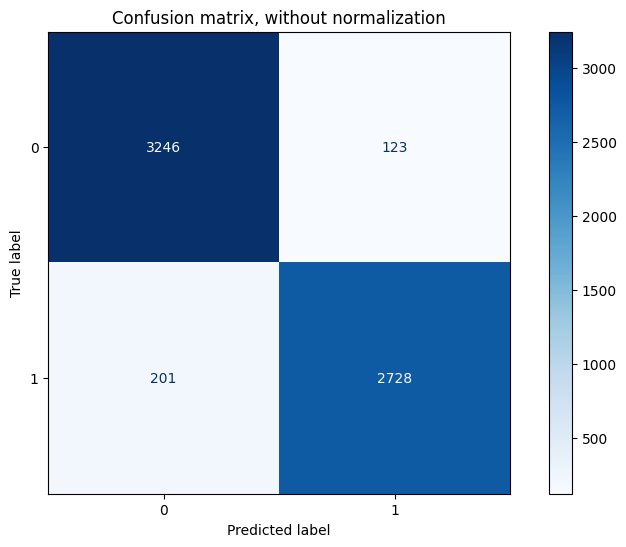

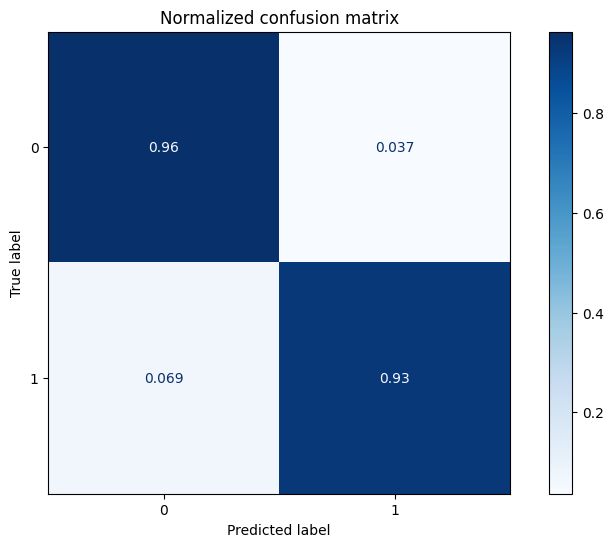

In [63]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

    # plt.savefig(f'fig/conf_matrix_{classifier}')

In [64]:
X_train_r, X_test_r, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9510955859002858
Precision: 0.9596632760434936
Recall: 0.9341072038238306
F1-score: 0.946712802768166


Confusion matrix, without normalization
[[3254  115]
 [ 193 2736]]
Normalized confusion matrix
[[0.96586524 0.03413476]
 [0.0658928  0.9341072 ]]


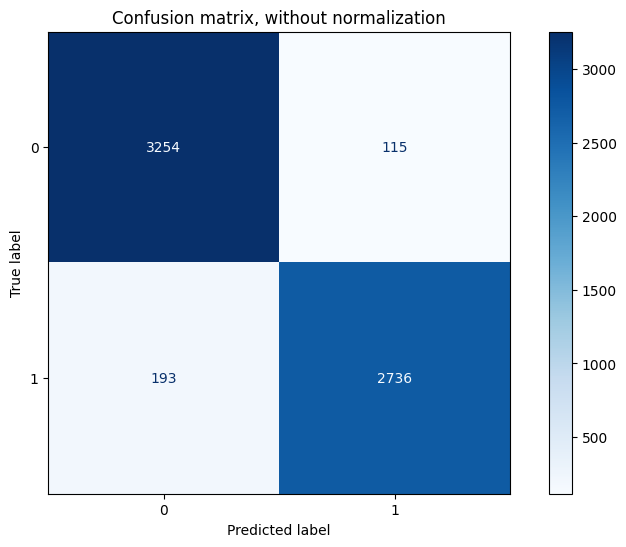

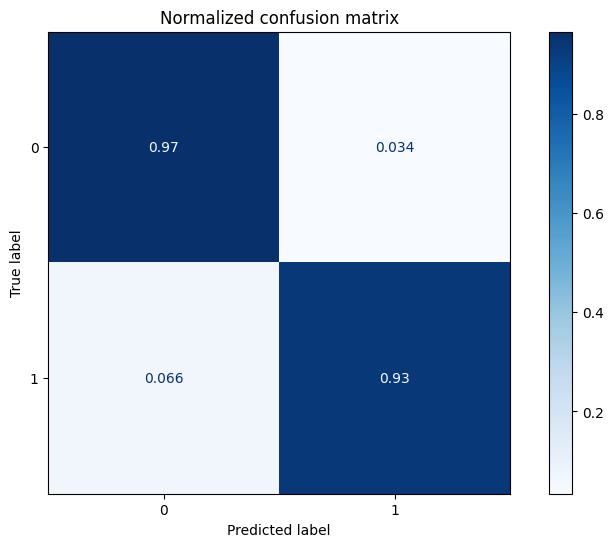

In [65]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### Support Vector Machine (SVM) Classifier

In [66]:
K=36
# kern='sigmoid'
# kern='poly'
kern='linear'
accur = np.zeros((K,2))
prec = np.zeros((K,2))
rec = np.zeros((K,2))
f1 = np.zeros((K,2))

for i in range(K):

    decomposer = PCA(n_components=i+1)
    X_r = decomposer.fit(X).transform(X)
    X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
    sc_X = StandardScaler()
    X_train_r = sc_X.fit_transform(X_train_r)
    X_test_r = sc_X.transform(X_test_r)
    classifier = svm.SVC(kernel=kern)
    classifier.fit(X_train_r, Y_train)
    Y_pred = classifier.predict(X_test_r)
    accur [ i, 0]=i+1
    accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
    prec [ i, 0]=i+1
    prec [i,1] = metrics.precision_score(Y_test, Y_pred)
    rec [ i, 0]=i+1
    rec [i,1] = metrics.recall_score(Y_test, Y_pred)
    f1 [ i, 0]=i+1
    f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

maximum_accur = max(accur[:,1])
print("Maximum Accuracy is:", maximum_accur)
print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maximum Accuracy is: 0.9549063194664973
Maximum Accuracy is at K: 26.0


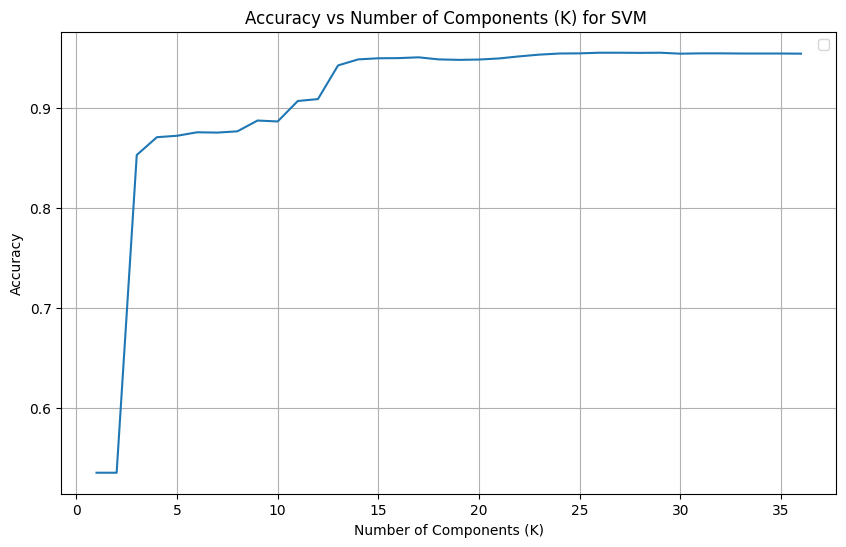

In [67]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components (K) for SVM ')
plt.legend()

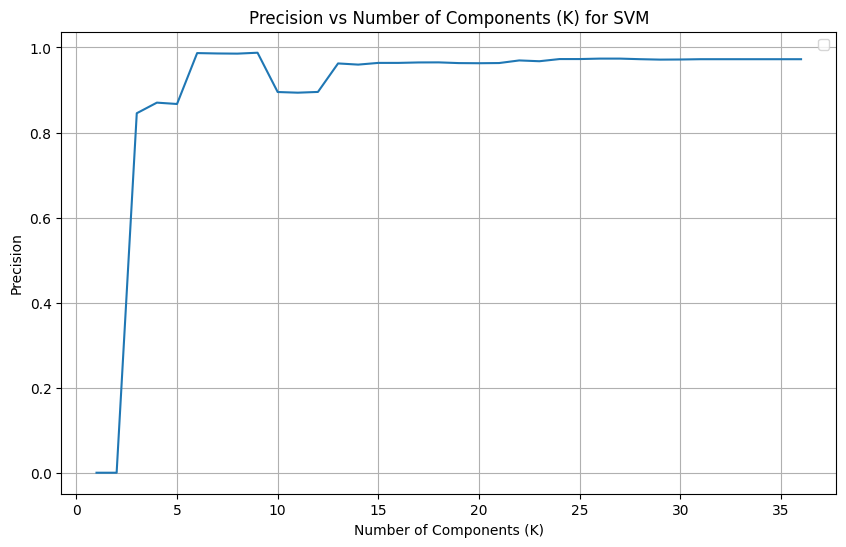

In [68]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K) for SVM')
plt.legend()

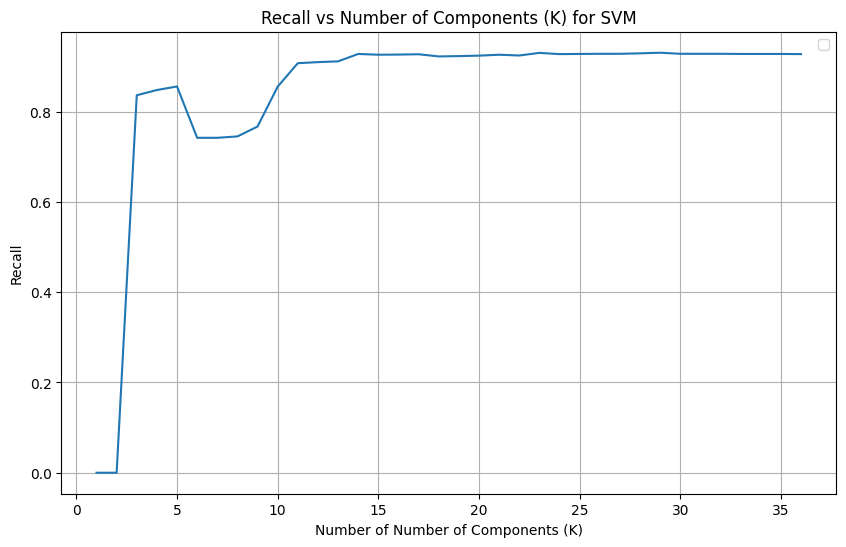

In [69]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K) for SVM')
plt.legend()

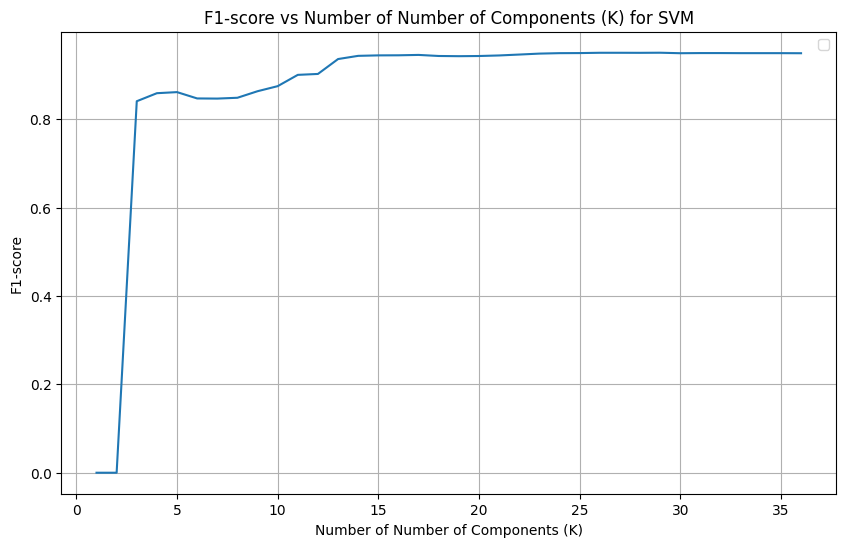

In [70]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K) for SVM')
plt.legend()

In [71]:
K=21
# kern='sigmoid'
kern='poly'
# kern='linear'
# kern='precomputed'

decomposer = PCA(n_components=K)
X_r = decomposer.fit(X).transform(X)
X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 0)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = svm.SVC(kernel=kern)
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9861860908224833
Precision: 0.9882434301521439
Recall: 0.9817931982136723
F1-score: 0.9850077546096847


Confusion matrix, without normalization
[[3353   34]
 [  53 2858]]
Normalized confusion matrix
[[0.98996162 0.01003838]
 [0.0182068  0.9817932 ]]


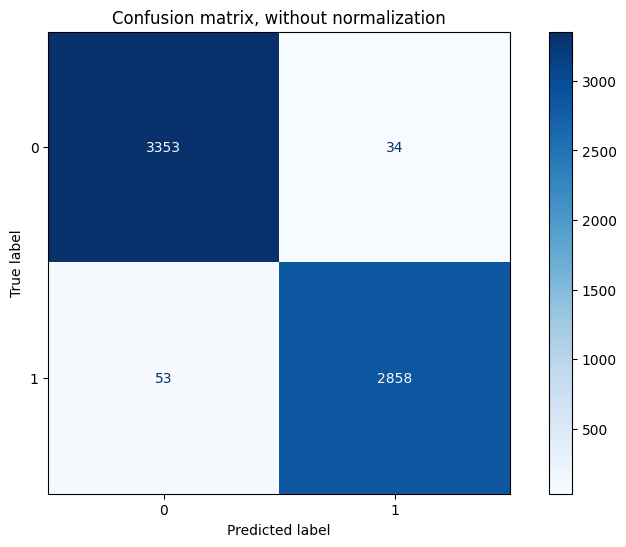

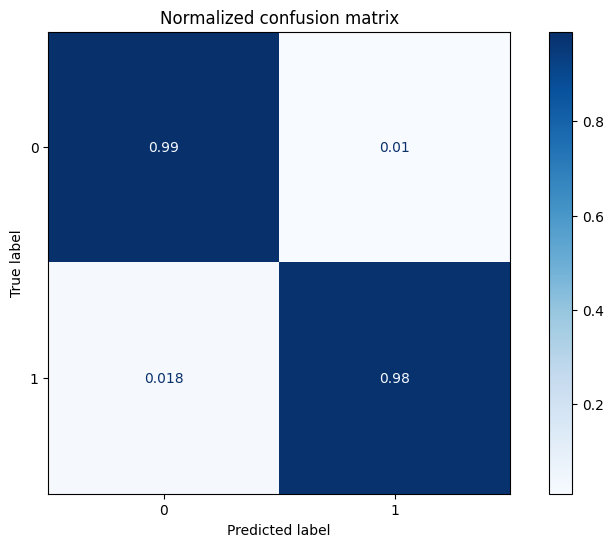

In [72]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### SVM without PCA

In [73]:
# kern='sigmoid'
kern='poly'
# kern='linear'

X_train_r, X_test_r, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = svm.SVC(kernel=kern)
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9812638932994602
Precision: 0.9909186168354872
Recall: 0.9685899624445203
F1-score: 0.9796270718232044


Confusion matrix, without normalization
[[3343   26]
 [  92 2837]]
Normalized confusion matrix
[[0.99228258 0.00771742]
 [0.03141004 0.96858996]]


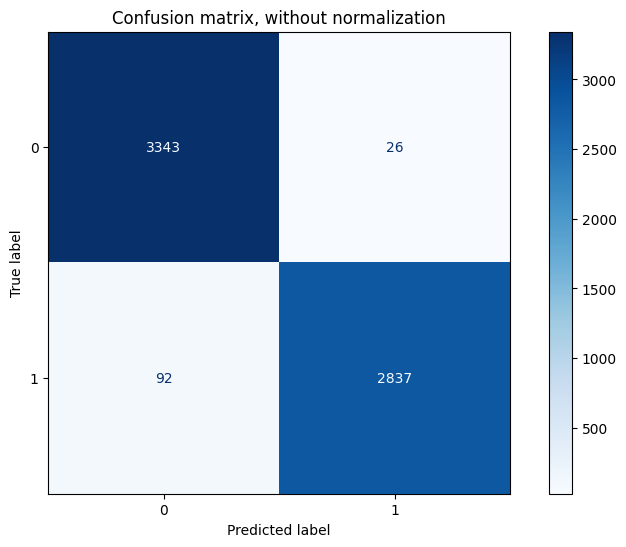

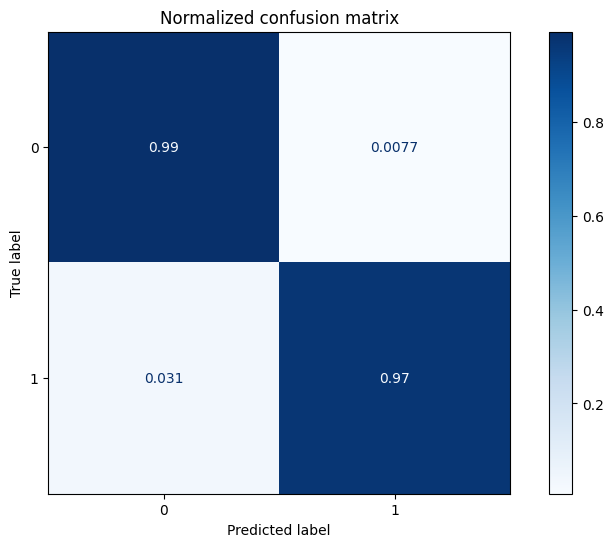

In [74]:
 titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### Naive Bayes (NB) Classifier

In [75]:
K=36

accur = np.zeros((K,2))
prec = np.zeros((K,2))
rec = np.zeros((K,2))
f1 = np.zeros((K,2))

for i in range(K):

    decomposer = PCA(n_components=i+1)
    X_r = decomposer.fit(X).transform(X)
    X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
    sc_X = StandardScaler()
    X_train_r = sc_X.fit_transform(X_train_r)
    X_test_r = sc_X.transform(X_test_r)
    classifier = GaussianNB()
    classifier.fit(X_train_r, Y_train)
    Y_pred = classifier.predict(X_test_r)
    accur [ i, 0]=i+1
    accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
    prec [ i, 0]=i+1
    prec [i,1] = metrics.precision_score(Y_test, Y_pred)
    rec [ i, 0]=i+1
    rec [i,1] = metrics.recall_score(Y_test, Y_pred)
    f1 [ i, 0]=i+1
    f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

maximum_accur = max(accur[:,1])
print("Maximum Accuracy is:", maximum_accur)
print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


Maximum Accuracy is: 0.9439504604636393
Maximum Accuracy is at K: 18.0


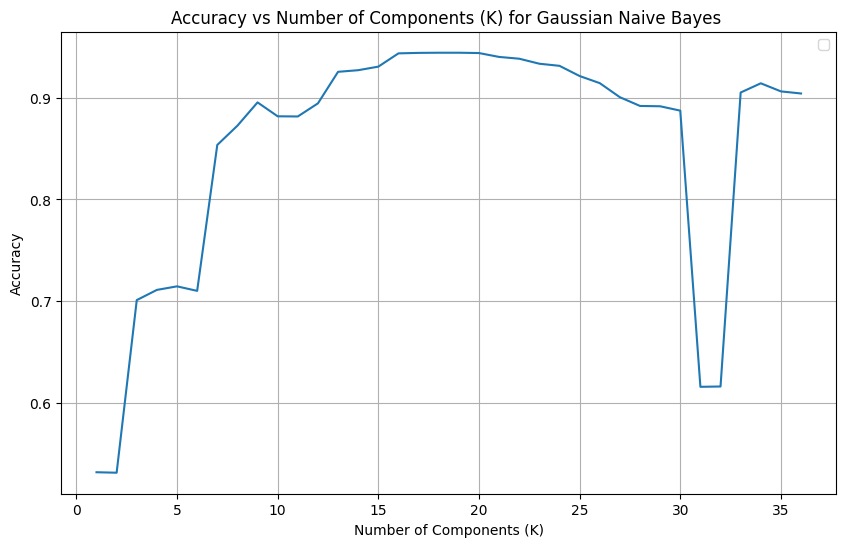

In [76]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components (K) for Gaussian Naive Bayes ')
plt.legend()

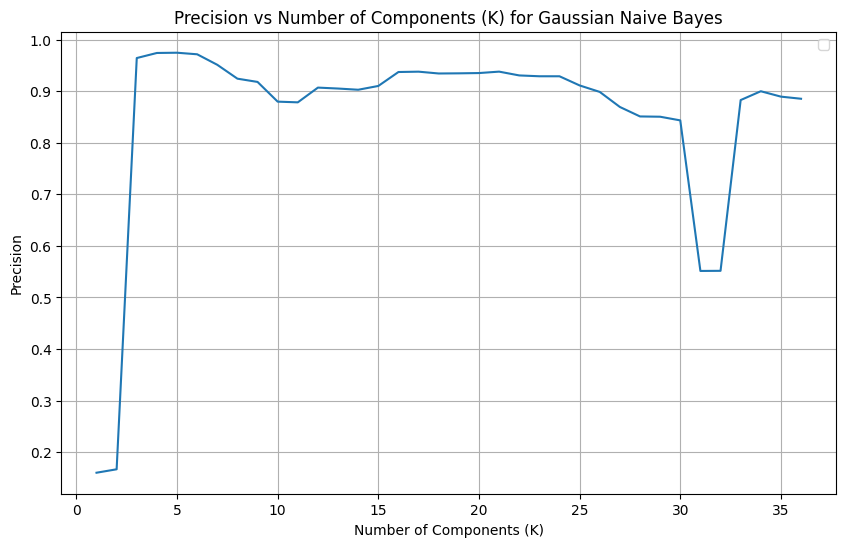

In [77]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K) for Gaussian Naive Bayes')
plt.legend()

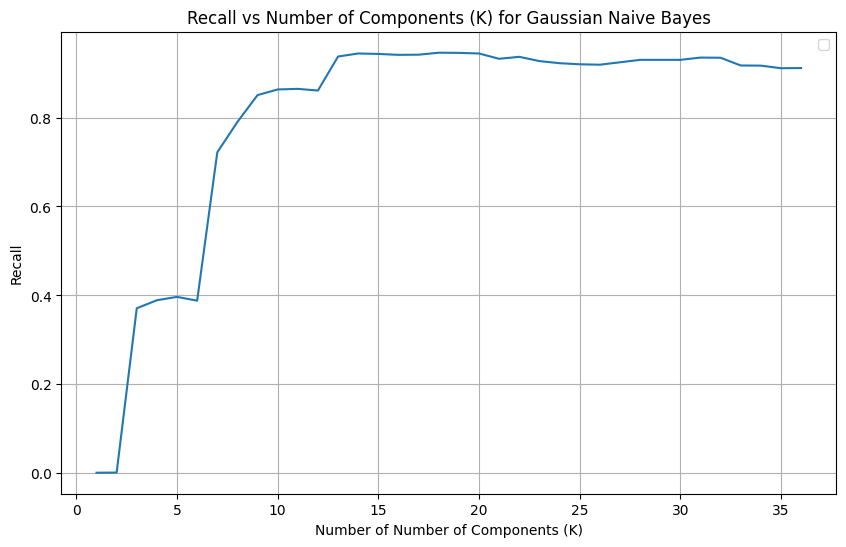

In [78]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K) for Gaussian Naive Bayes')
plt.legend()

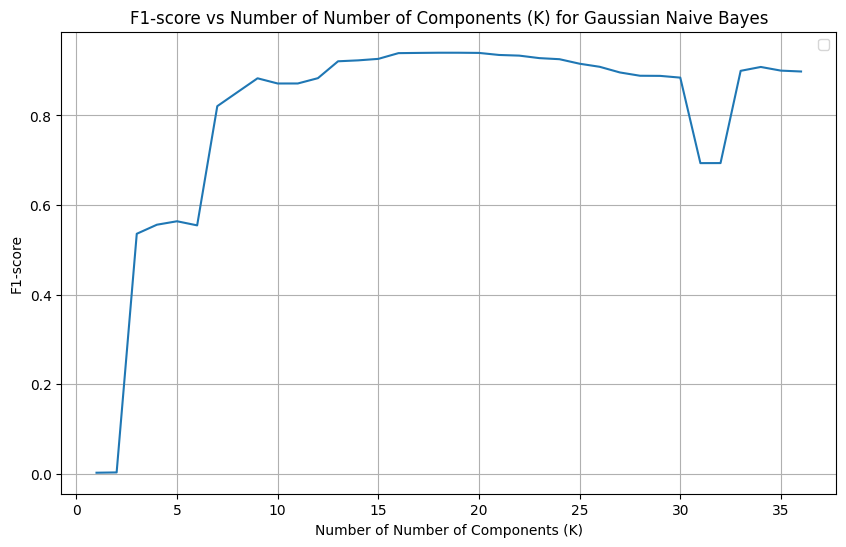

In [79]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K) for Gaussian Naive Bayes')
plt.legend()

In [80]:
K=21

decomposer = PCA(n_components=K)
X_r = decomposer.fit(X).transform(X)
X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = GaussianNB()
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9398221657669101
Precision: 0.9381443298969072
Recall: 0.9320587231136906
F1-score: 0.935091625278301


Confusion matrix, without normalization
[[3189  180]
 [ 199 2730]]
Normalized confusion matrix
[[0.94657168 0.05342832]
 [0.06794128 0.93205872]]


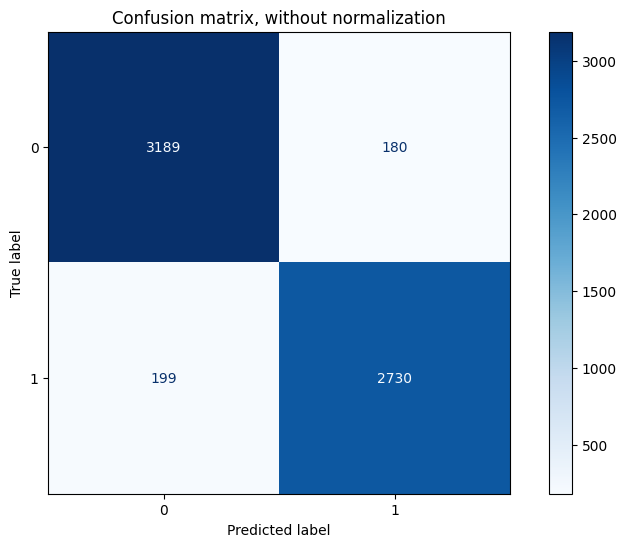

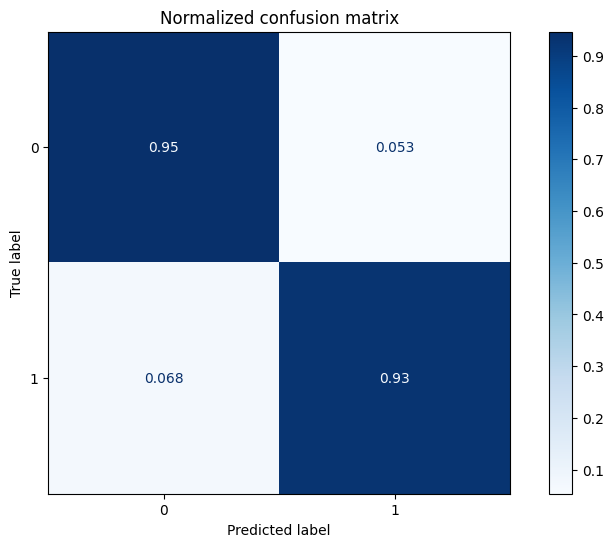

In [81]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### Guassion NB Without PCA

In [82]:

X_train_r, X_test_r, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = GaussianNB()
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9180692283264529
Precision: 0.9181975736568457
Recall: 0.904404233526801
F1-score: 0.9112487100103199


Confusion matrix, without normalization
[[3133  236]
 [ 280 2649]]
Normalized confusion matrix
[[0.92994954 0.07005046]
 [0.09559577 0.90440423]]


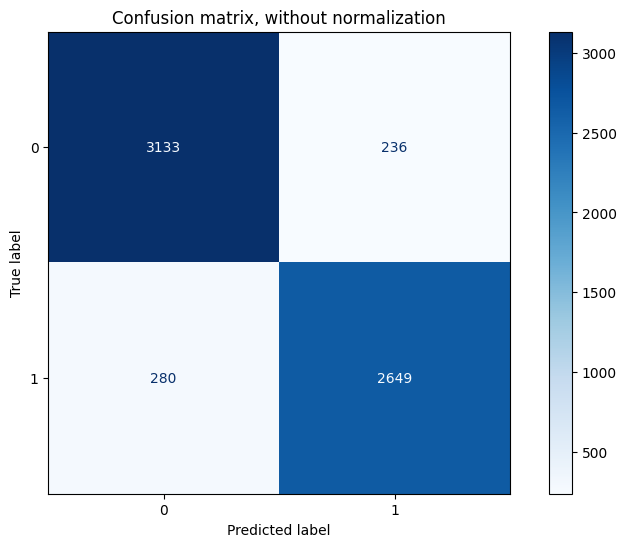

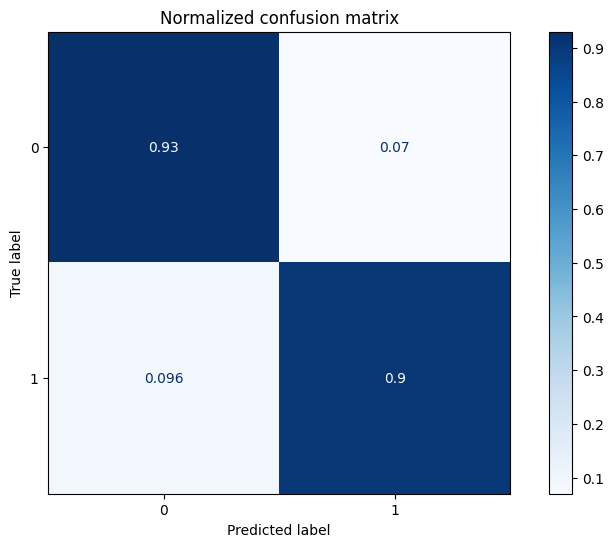

In [83]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)